# Activity: Explore confidence intervals

## Introduction

The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health. The United States is considering a new federal policy that would create a subsidy for renewable energy in states observing an average AQI of 10 or above. <br>

You've just started your new role as a data analyst in the Strategy division of Ripple Renewable Energy (RRE). **RRE operates in the following U.S. states: `California`, `Florida`, `Michigan`, `Ohio`, `Pennsylvania`, `Texas`.** You've been tasked with constructing an analysis which identifies which of these states are most likely to be affected, should the new federal policy be enacted.

Your manager has requested that you do the following for your analysis:
1. Provide a summary of the mean AQI for the states in which RRE operates.
2. Construct a boxplot visualization for AQI of these states using `seaborn`.
3. Evaluate which state(s) may be most affected by this policy, based on the data and your boxplot visualization.
4. Construct a confidence interval for the RRE state with the highest mean AQI.

## Step 1: Imports

### Import packages

Import `pandas` and `numpy`.

In [3]:
# Import relevant packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

### Load the dataset

The dataset provided gives national Air Quality Index (AQI) measurements by state over time.  `Pandas` is used to import the file `c4_epa_air_quality.csv` as a DataFrame named `aqi`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

*Note: For the purposes of your analysis, you can assume this data is randomly sampled from a larger population.*

In [4]:
# RUN THIS CELL TO IMPORT YOUR DATA

### YOUR CODE HERE ###
aqi = pd.read_csv('./data/c4_epa_air_quality.csv')

## Step 2: Data exploration

### Explore your dataset

Before proceeding to your deliverables, spend some time exploring the `aqi` DataFrame. 

In [68]:
# Explore your DataFrame `aqi`.

#aqi.describe()
#aqi.head(10)
#aqi['date_local']
#aqi.columns
#aqi['aqi'].max()
# aqi.columns
# slected_cols=aqi[['state_name','aqi']]
# print(slected_cols.to_string())
# display(aqi.to_string())
# display(aqi['state_name'].unique)
us=aqi['state_name'].unique()
print(us)
len(us)

['Arizona' 'Ohio' 'Wyoming' 'Pennsylvania' 'Iowa' 'Hawaii' 'Colorado'
 'Minnesota' 'Indiana' 'Missouri' 'Connecticut' 'California' 'Nevada'
 'Virginia' 'Rhode Island' 'Texas' 'Illinois' 'Kansas' 'Maryland'
 'New Jersey' 'Massachusetts' 'Maine' 'Idaho' 'Florida' 'Vermont'
 'Tennessee' 'Georgia' 'South Dakota' 'North Carolina' 'West Virginia'
 'Michigan' 'Nebraska' 'Alabama' 'Washington' 'Kentucky' 'Oklahoma'
 'New York' 'North Dakota' 'Montana' 'Utah' 'Delaware' 'New Hampshire'
 'Louisiana' 'Mississippi' 'New Mexico' 'Oregon' 'District Of Columbia'
 'Arkansas' 'Puerto Rico' 'South Carolina' 'Alaska' 'Wisconsin']


52

In [71]:
aqi.head(10).to_string

<bound method DataFrame.to_string of    Unnamed: 0  date_local    state_name   county_name      city_name  \
0           0  2018-01-01       Arizona      Maricopa        Buckeye   
1           1  2018-01-01          Ohio       Belmont      Shadyside   
2           2  2018-01-01       Wyoming         Teton  Not in a city   
3           3  2018-01-01  Pennsylvania  Philadelphia   Philadelphia   
4           4  2018-01-01          Iowa          Polk     Des Moines   
5           5  2018-01-01        Hawaii      Honolulu  Not in a city   
6           6  2018-01-01        Hawaii      Honolulu  Not in a city   
7           7  2018-01-01  Pennsylvania          Erie           Erie   
8           8  2018-01-01        Hawaii      Honolulu       Honolulu   
9           9  2018-01-01      Colorado       Larimer   Fort Collins   

                                     local_site_name   parameter_name  \
0                                            BUCKEYE  Carbon monoxide   
1                       

*********************************************************
BELOW ARE THE INSTRUCTORS ANSWERS TO THE DESCRIBE SECTION

In [5]:
print(aqi.describe(include='all'))

        Unnamed: 0  date_local  state_name  county_name      city_name  \
count   260.000000         260         260          260            260   
unique         NaN           1          52          149            190   
top            NaN  2018-01-01  California  Los Angeles  Not in a city   
freq           NaN         260          66           14             21   
mean    129.500000         NaN         NaN          NaN            NaN   
std      75.199734         NaN         NaN          NaN            NaN   
min       0.000000         NaN         NaN          NaN            NaN   
25%      64.750000         NaN         NaN          NaN            NaN   
50%     129.500000         NaN         NaN          NaN            NaN   
75%     194.250000         NaN         NaN          NaN            NaN   
max     259.000000         NaN         NaN          NaN            NaN   

       local_site_name   parameter_name   units_of_measure  arithmetic_mean  \
count              257          

In [6]:
print("For a more thorough examination of observations by state use values_counts()")
print(aqi['state_name'].value_counts())

For a more thorough examination of observations by state use values_counts()
state_name
California              66
Arizona                 14
Ohio                    12
Florida                 12
Texas                   10
New York                10
Pennsylvania            10
Michigan                 9
Colorado                 9
Minnesota                7
New Jersey               6
Indiana                  5
North Carolina           4
Massachusetts            4
Maryland                 4
Oklahoma                 4
Virginia                 4
Nevada                   4
Connecticut              4
Kentucky                 3
Missouri                 3
Wyoming                  3
Iowa                     3
Hawaii                   3
Utah                     3
Vermont                  3
Illinois                 3
New Hampshire            2
District Of Columbia     2
New Mexico               2
Montana                  2
Oregon                   2
Alaska                   2
Georgia              

**Question:** What time range does this data cover?

All data was collected on the same day 01-01-2018


**Question:** What are the minimum and maximum AQI values observed in the dataset?

Min = 0, Max =50

**Question:** Are all states equally represented in the dataset?

Yes. And some more... There are 52 states .. so it includes Puerot Rico and District of Columbia  ... True bu tht eh wrong take on the answer. It was asking if all states had the same number of reports / rows of data. 

I misintgerpreted this question. In fact, the last query with value_counts() function shows the number of rows per state. 
NOTE that California has 66 sites that reported AQI for this dataset, while states such as Delaware and Alabama have only one site that reported AQI.
 all states are not equally represented. 

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about descriptive statisics](https://www.coursera.org/learn/the-power-of-statistics/lecture/jVRS4/measures-of-central-tendency).
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use `pandas` or `numpy` to explore the `aqi` DataFrame.
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use any of the following functions:
- `pandas`: `describe()`,`value_counts()`,`shape()`
- `numpy`: `unique()`,`mean()`
    
</details>

## Step 3: Statistical tests

### Summarize the mean AQI for RRE states

Start with your first deliverable. Summarize the mean AQI for the states in which RRE operates (California, Florida, Michigan, Ohio, Pennsylvania, and Texas).

In [104]:
# Summarize the mean AQI for RRE states.

# Create a list of RRE states.
rre_states=['California', 'Florida', 'Michigan', 'Ohio', 'Pennsylvania', 'Texas']

# Subset `aqi` to only consider these states.

mask=aqi['state_name'].isin(rre_states)
aqi_rre=aqi[mask]
aqi_rre['aqi'].mean()
print(f"Overall mean {aqi_rre['aqi'].mean()}")
# Find the mean aqi for each of the RRE states.
aqi_rre_red=aqi_rre.get(['state_name','aqi'])
grouped=aqi_rre_red.groupby(['state_name'])
grouped.mean()

Overall mean 8.697478991596638
<class 'pandas.core.frame.DataFrame'>


,aqi
state_name,
California,12.121212
Florida,5.500000
Michigan,8.111111
Ohio,3.333333
Pennsylvania,2.900000
Texas,2.700000


********************************************************************************
BELOW ARE THE INSTRUCTORS ANSWERS TO THE RRE_STATES breakout questions

In [18]:
# Create a list of RRE states.

rre_states = ['California','Florida','Michigan','Ohio','Pennsylvania','Texas']

# Subset `aqi` to only consider these states.

aqi_rre = aqi[aqi['state_name'].isin(rre_states)]
#print(aqi_rre['state_name'].to_list())p
print(aqi_rre.to_string())
# Find the mean aqi for each of the RRE states.

aqi_rre.groupby(['state_name']).agg({"aqi":"mean","state_name":"count"}) #alias as aqi_rre

     Unnamed: 0  date_local    state_name     county_name                  city_name                                    local_site_name   parameter_name   units_of_measure  arithmetic_mean  aqi
1             1  2018-01-01          Ohio         Belmont                  Shadyside                                          Shadyside  Carbon monoxide  Parts per million         0.263158    5
3             3  2018-01-01  Pennsylvania    Philadelphia               Philadelphia                             North East Waste (NEW)  Carbon monoxide  Parts per million         0.300000    3
7             7  2018-01-01  Pennsylvania            Erie                       Erie                                                NaN  Carbon monoxide  Parts per million         0.200000    2
12           12  2018-01-01          Ohio        Hamilton                 Cincinnati                                         Taft NCore  Carbon monoxide  Parts per million         0.252632    3
16           16  2018-01-01   

,aqi,state_name
state_name,,
California,12.121212,66
Florida,5.500000,12
Michigan,8.111111,9
Ohio,3.333333,12
Pennsylvania,2.900000,10
Texas,2.700000,10


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Subset your DataFrame to only include those states in which RRE operates. 
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Define a list consisting of the states in which RRE operates and use that list to subset your DataFrame. 
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use `pandas` `isin.()` to subset your DataFrame by the list of RRE states.
    
</details>

### Construct a boxplot visualization for the AQI of these states

Seaborn is a simple visualization library, commonly imported as `sns`. Import `seaborn`. Then utilize a boxplot visualization from this library to compare the distributions of AQI scores by state.

Text(0.5, 1.0, 'Air Quality Index Values By State')

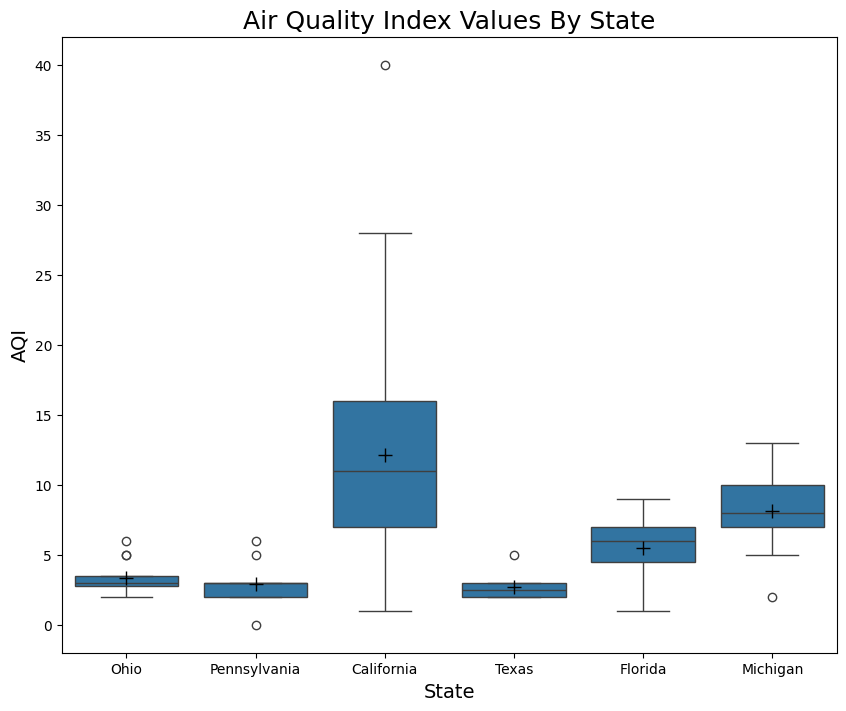

In [22]:
# Import seaborn as sns.
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.boxplot(x='state_name',
            y='aqi',
            data=aqi_rre,
            showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
plt.ylabel("AQI", size=14)
plt.xlabel("State", size=14)
plt.title("Air Quality Index Values By State", size=18)






### YOUR CODE HERE ###

********************************************************************************
BELOW ARE THE INSTRUCTORS ANSWERS TO THE RRE_STATES breakout questions

<Axes: xlabel='state_name', ylabel='aqi'>

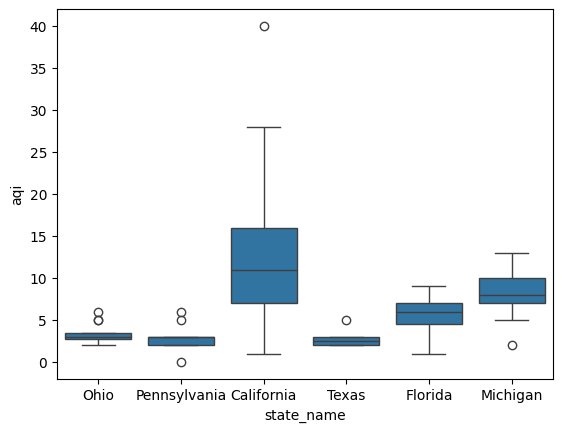

In [21]:
sns.boxplot(x=aqi_rre["state_name"],y=aqi_rre["aqi"])

### Create an in-line visualization showing the distribution of `aqi` by `state_name`

Now, create an in-line visualization showing the distribution of `aqi` by `state_name`.

In [ ]:
### YOUR CODE HERE ###

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the boxplot visual for this purpose.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Reference [Seaborn's boxplot visualization documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html). 
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Assign `state_name` to the x argument and `aqi` to the y.
    
</details>

**Question:** Based on the data and your visualizations, which state(s) do you suspect will be most affected by this policy?

California will be most affected 

California: The mean and a signficant portion of the boxplot range over 10.
Michigan: While the mean is below 10, the boxplot ranges above 10.

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Consider the mean AQI for the RRE states, as well as the distribution in the boxplots relative to the policy limit (10).
    
</details>

### Construct a confidence interval for the RRE state with the highest mean AQI

Recall the 4-step process in constructing a confidence interval:

1.   Identify a sample statistic.
2.   Choose a confidence level.
3.   Find the margin of error. 
4.   Calculate the interval.

### Construct your sample statistic

To contruct your sample statistic, find the mean AQI for your state.

In [34]:
# Find the mean aqi for your state.

mask=aqi['state_name'].isin(['California'])
aqi_cal=aqi[mask]
print(len(aqi_cal))
sampled_data = aqi_cal.sample(n=50, replace=True, random_state=31208)
sampled_data
sample_mean = sampled_data['aqi'].mean()
print(sample_mean)
estimated_standard_error = sampled_data['aqi'].std() / np.sqrt(sampled_data.shape[0])
print(estimated_standard_error)
stats.norm.interval(0.95, loc=sample_mean, scale=estimated_standard_error)

66
14.28
1.2342195749475349


(11.860974084088497, 16.699025915911502)

********************************************************************************
BELOW ARE THE INSTRUCTORS ANSWERS TO THE RRE_STATES breakout questions

In [39]:
aqi_ca = aqi[aqi['state_name']=='California']

print(aqi_ca['aqi'].count())

sample_mean = aqi_ca['aqi'].mean()
sample_mean

66


12.121212121212121

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Reference what you've previously learned to recall what a [sample statistic](https://www.coursera.org/learn/the-power-of-statistics/supplement/cdOx7/construct-a-confidence-interval-for-a-small-sample-size) is.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Calculate the mean for your highest AQI state to arrive at your sample statistic.
    
</details>

<details>
 <summary><h4><strong>Hint 3</strong></h4></summary>

Call the `mean()` function within `pandas` on your DataFrame.
    
</details>

### Choose your confidence level

Choose your confidence level for your analysis. The most typical confidence level chosen is 95%; however, you can choose 90% or 99% if you want decrease or increase (respectively) your level of confidence about your result.

In [130]:
# Input your confidence level here: 95%

confidence_level = .95

### Find your margin of error (ME)

Recall **margin of error = z * standard error**, where z is the appropriate z-value for the given confidence level. To calculate your margin of error:

- Find your z-value. 
- Find the approximate z for common confidence levels.
- Calculate your **standard error** estimate. 

| Confidence Level | Z Score |
| --- | --- |
| 90% | 1.65 |
| 95% | 1.96 |
| 99% | 2.58 |


In [27]:
# Calculate your margin of error.

### YOUR CODE HERE ###



# Begin by identifying the z associated with your chosen confidence level.
zval=1.96

# Next, calculate your standard error.
standard_error = aqi_ca['aqi'].std() / np.sqrt(aqi_ca.shape[0])
print("standard error")
print(standard_error)

# Lastly, use the preceding result to calculate your margin of error.
margin_of_error= estimated_standard_error * zval
print("margin of error")
print(margin_of_error)


standard error
0.8987209641127412
margin of error
1.7614930896609726


### Calculate your interval

Calculate both a lower and upper limit surrounding your sample mean to create your interval.

In [30]:
# Calculate your confidence interval (upper and lower limits).

upper_aqi = sample_mean + margin_of_error
lower_aqi = sample_mean - margin_of_error

print(f"Mean is {sample_mean} with lower limit being {lower_aqi} and upper limit being {upper_aqi}")

Mean is 12.121212121212121 with lower limit being 10.359719031551148 and upper limit being 13.882705210873095


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about constructing a confidence interval](https://www.coursera.org/learn/the-power-of-statistics/lecture/3jbsX/construct-a-confidence-interval-for-a-proportion).
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Identify the sample mean from your prior work. Then use the margin of error to construct your upper and lower limits.  
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Subtract the margin of error from the sample mean to construct your lower limit, and add the margin of error to your sample mean to construct your upper limit.
    
</details>

### Alternative: Construct the interval using `scipy.stats.norm.interval()`

`scipy` presents a simpler solution to developing a confidence interval. To use this, first import the `stats` module from `scipy`.

In [129]:
# Import stats from scipy.
from scipy import stats
import statsmodels.api as sm



## Step 4: Results and evaluation

### Recalculate your confidence interval

Provide your chosen `confidence_level`, `sample_mean`, and `standard_error` to `stats.norm.interval()` and recalculate your confidence interval.

In [41]:
stats.norm.interval(0.99, loc=sample_mean, scale=estimated_standard_error)### YOUR CODE HERE ###

(8.942073173048593, 15.30035106937565)

# Considerations

**What are some key takeaways that you learned from this lab?**

[Write your response here. Double-click (or enter) to edit.]

**What findings would you share with others?**

[Write your response here. Double-click (or enter) to edit.]

**What would you convey to external stakeholders?**

[Write your response here. Double-click (or enter) to edit.]

**References**

[seaborn.boxplot — seaborn 0.12.1 documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html). (n.d.). 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.